# Fish Detection with Bbox Regressor and Classifier

## 0. Preparation

In [1]:
import os, sys
import numpy as np
from mylib.models import Ipv3BboxClassifier, Ipv3BboxRegressor
from mylib.models import FishDetector
from mylib.dataio import TestDataReader
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


file_dir = os.path.dirname(os.path.abspath('__file__'))


# settings
seed = 7
np.random.seed(seed)
debug = 0
ipv3_bbox_classifier_weights = os.path.join(
    file_dir, 
    'ipv3_bbox_classifier_weights/ipv3_bbox_classifier-03--0.00--1.00.h5',
)
input_shape = (299, 299, 3)
ipv3_bbox_regressor_weights = os.path.join(
    file_dir,
    'ipv3_bbox_regressor_weights_2/ipv3_bbox_regressor_nb_5-184--10.47-19.39.h5',
)
nb_bbox = 5

Using TensorFlow backend.


In [2]:
# load test image
test_data_reader = TestDataReader()
images_test, image_names_test, _ = test_data_reader.load_test_image_bbox_imgname(debug=debug)

Start loading test dataset!
Finish loading test data!


In [3]:
# create Fish Detector
bbox_regressor = Ipv3BboxRegressor(weights_file=ipv3_bbox_regressor_weights, nb_bbox=nb_bbox)  # create bbox regressor
bbox_classifier = Ipv3BboxClassifier(weights_file=ipv3_bbox_classifier_weights, input_shape=input_shape)  # create bbox classifier
fish_detector = FishDetector(bbox_regressor, bbox_classifier)

## 1. Show some samples

In [7]:
# samples of images to draw
image_idxs = range(330, 340)
images_show = images_test[image_idxs]
image_names_show = image_names_test[image_idxs]

In [8]:
# fish detect
fish_bboxes_show = fish_detector.detect(images_show, thresh=0.8, verbose=1)

Detecting 0 / 10
Detecting 1 / 10
Detecting 2 / 10
Detecting 3 / 10
Detecting 4 / 10
Detecting 5 / 10
Detecting 6 / 10
Detecting 7 / 10
Detecting 8 / 10
Detecting 9 / 10


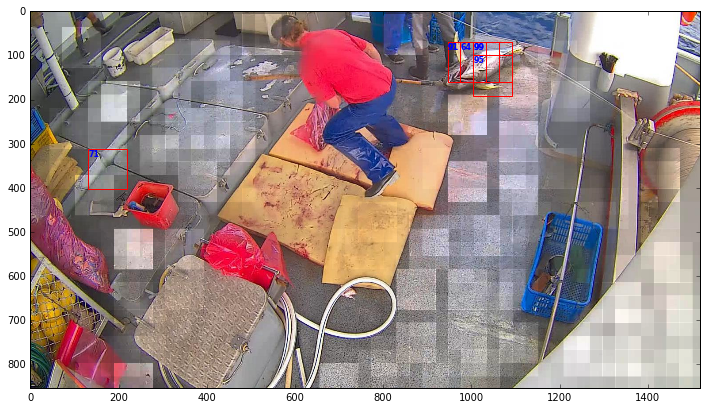

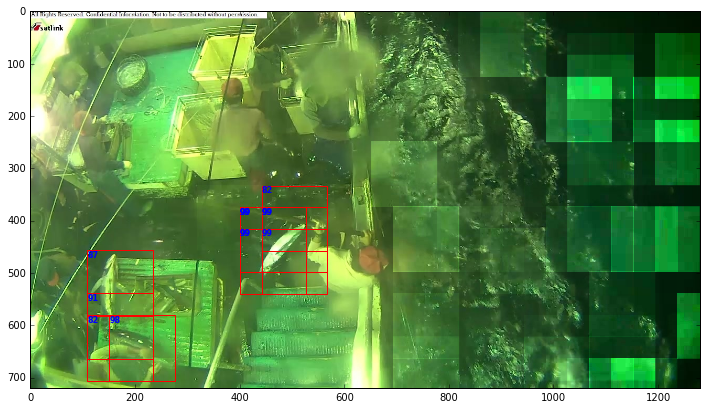

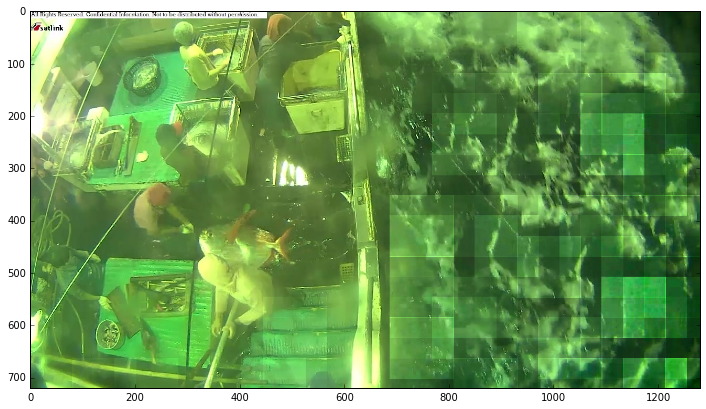

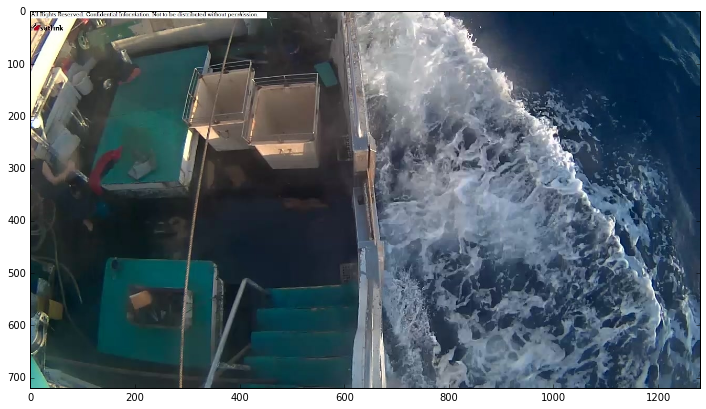

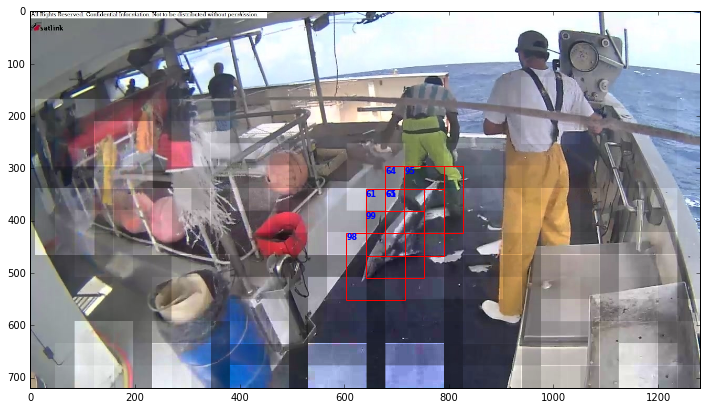

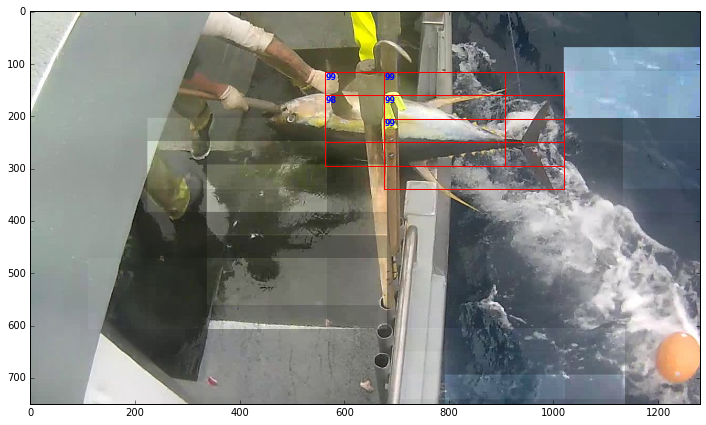

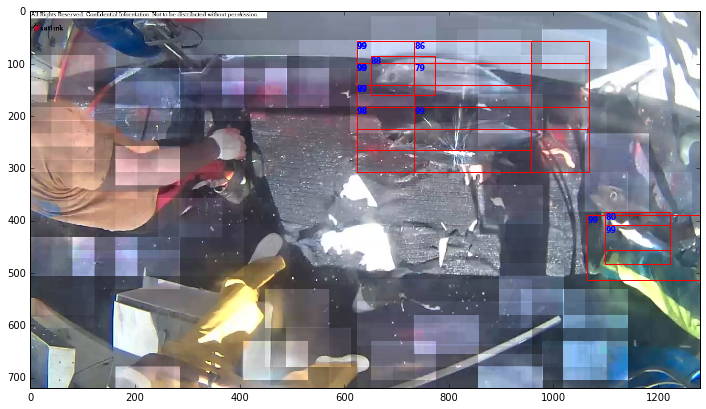

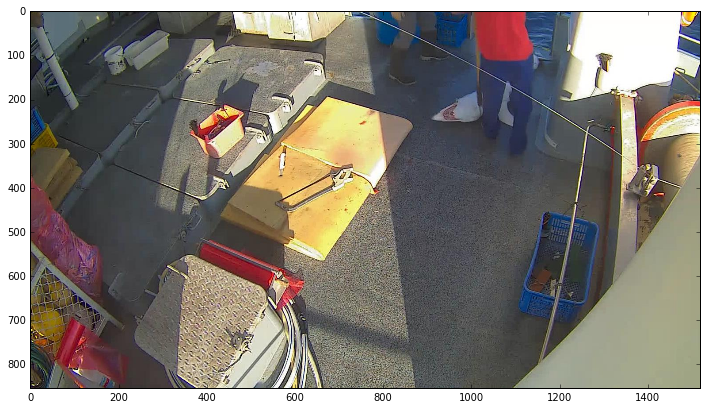

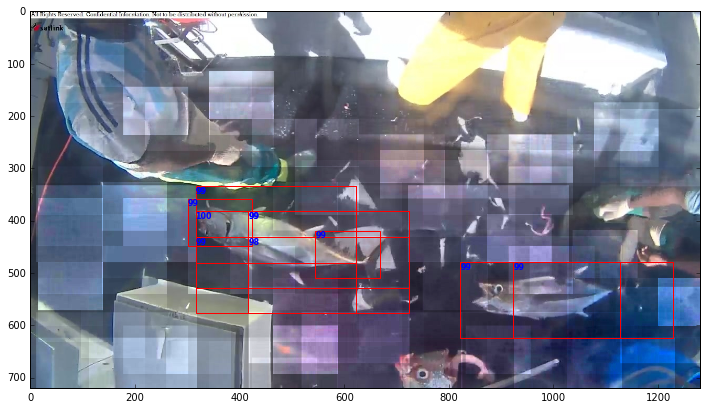

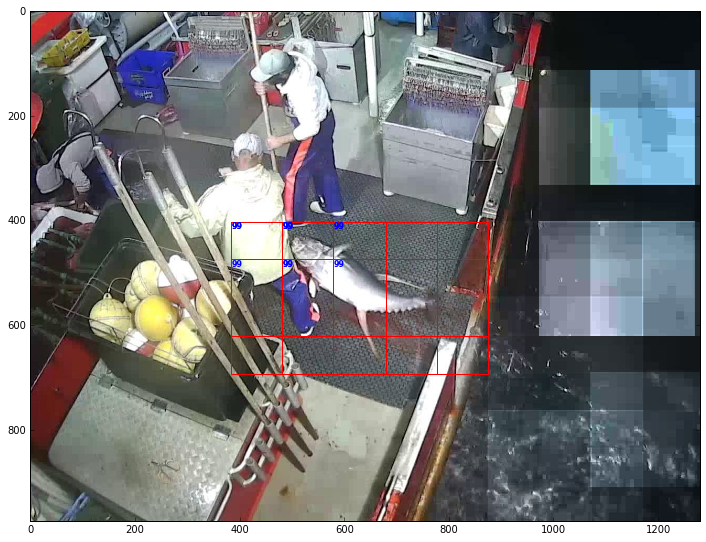

In [9]:
for i in range(len(images_show)):
    image = images_show[i]
    bboxes = fish_bboxes_show[i]
    
    # draw rectangles on the original image
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
    ax.imshow(image.astype('uint8'))
    for idx in range(len(bboxes)):
        bbox = bboxes[idx]
        x, y, w, h, s = bbox[:]
        rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.annotate(str(s), (x, y), color='b', weight='bold', fontsize=8, ha='left', va='top')
        ax.add_patch(rect)
    plt.show()

## 3. Generate Json

In [ ]:
fish_bboxes_test = fish_detector.detect(images_test, thresh=0.8, verbose=20)

In [ ]:
json_dict = {}
for i in range(len(images_test)):
    image_name = image_names_test[i]
    bboxes = fish_bboxes_test[i]
    json_dict[image_name] = bboxes

In [ ]:
import json
str_json = json.dumps(json_dict)
with open("./my_test_stg1.json", 'w') as f:
    f.write(str_json)